## Exploration of HHS plan attributes PUF data for 2014, 2015 and 2016
steeve@stanford.edu

### A bit of setup

In [4]:
#Setup
import datetime as dt
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#import helper functions
from utils.utils import*

%matplotlib inline

# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
# sns.set_palette(sns.color_palette("cubehelix", 8))
pd.set_option('display.max_columns', 500)
plt.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

####################################################
# steeve@stanford.edu from everett@bayesimpact.org
####################################################

### Locate the data

In [5]:
DATA_FILE_2014 = '~/Google Drive/bayeshack2016-prep-HHS/data-raw/PlanAttributes/plan_Attributes_PUF_2014.csv'
DATA_FILE_2015 = '~/Google Drive/bayeshack2016-prep-HHS/data-raw/PlanAttributes/plan_Attributes_PUF_2015.csv'
DATA_FILE_2016 = '~/Google Drive/bayeshack2016-prep-HHS/data-raw/PlanAttributes/plan_Attributes_PUF_2016.csv'
DATA_FILE_cleaned = '/Google Drive/bayeshack2016-prep-HHS/data-cleaned/'

### Load, convert, and glance at data for 2014 and 2015

In [6]:
df_2014 = pd.read_csv(DATA_FILE_2014)
df_2015 = pd.read_csv(DATA_FILE_2015)

/Users/steeve/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/steeve/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (33,71,72,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2014 and 2015 datasets have the same attributes and are concatenated
All strings are set to lower case

In [7]:
print sum(df_2014.columns==df_2015.columns)*100/len(df_2015.columns), '% of the attributes matched'
frames = [df_2014,df_2015]
df_2014_2015 = pd.concat(frames).reset_index(drop=True)
N_2014_2015 = len(df_2014_2015)
print 'Read %d rows %d cols\n' % df_2014_2015.shape 
df_2014_2015.head(3)

#set all strings to lower case
# df_cleaned_2014_2015.columns = map(str.lower, df_cleaned_2014_2015.columns)

100 % of the attributes matched
Read 49972 rows 126 cols



,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,BenefitPackageId,IssuerId2,StateCode2,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,HIOSProductId,HPID,NetworkId,ServiceAreaId,FormularyId,IsNewPlan,PlanType,MetalLevel,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,SpecialistRequiringReferral,PlanLevelExclusions,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ChildOnlyOffering,ChildOnlyPlanId,WellnessProgramOffered,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentPremiumS4,IsGuaranteedRate,SpecialtyDrugMaximumCoinsurance,InpatientCopaymentMaximumDays,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,PlanEffictiveDate,PlanExpirationDate,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,NationalNetwork,URLForSummaryofBenefitsCoverage,URLForEnrollmentPayment,PlanBrochure,FormularyURL,PlanId,CSRVariationType,IssuerActuarialValue,AVCalculatorOutputNumber,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,MEHBInnTier1IndividualMOOP,MEHBInnTier1FamilyMOOP,MEHBInnTier2IndividualMOOP,MEHBInnTier2FamilyMOOP,MEHBOutOfNetIndividualMOOP,MEHBOutOfNetFamilyMOOP,MEHBCombInnOonIndividualMOOP,MEHBCombInnOonFamilyMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier1FamilyMOOP,DEHBInnTier2IndividualMOOP,DEHBInnTier2FamilyMOOP,DEHBOutOfNetIndividualMOOP,DEHBOutOfNetFamilyMOOP,DEHBCombInnOonIndividualMOOP,DEHBCombInnOonFamilyMOOP,TEHBInnTier1IndividualMOOP,TEHBInnTier1FamilyMOOP,TEHBInnTier2IndividualMOOP,TEHBInnTier2FamilyMOOP,TEHBOutOfNetIndividualMOOP,TEHBOutOfNetFamilyMOOP,TEHBCombInnOonIndividualMOOP,TEHBCombInnOonFamilyMOOP,MEHBDedInnTier1Individual,MEHBDedInnTier1Family,MEHBDedInnTier1Coinsurance,MEHBDedInnTier2Individual,MEHBDedInnTier2Family,MEHBDedInnTier2Coinsurance,MEHBDedOutOfNetIndividual,MEHBDedOutOfNetFamily,MEHBDedCombInnOonIndividual,MEHBDedCombInnOonFamily,DEHBDedInnTier1Individual,DEHBDedInnTier1Family,DEHBDedInnTier1Coinsurance,DEHBDedInnTier2Individual,DEHBDedInnTier2Family,DEHBDedInnTier2Coinsurance,DEHBDedOutOfNetIndividual,DEHBDedOutOfNetFamily,DEHBDedCombInnOonIndividual,DEHBDedCombInnOonFamily,TEHBDedInnTier1Individual,TEHBDedInnTier1Family,TEHBDedInnTier1Coinsurance,TEHBDedInnTier2Individual,TEHBDedInnTier2Family,TEHBDedInnTier2Coinsurance,TEHBDedOutOfNetIndividual,TEHBDedOutOfNetFamily,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamily,SBCHavingaBabyDeductible,SBCHavingaBabyCopayment,SBCHavingaBabyCoinsurance,SBCHavingaBabyLimit,SBCHavingDiabetesDeductible,SBCHavingDiabetesCopayment,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesLimit,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,1,21989,AK,SHOP (Small Group),Yes,93-0438772,21989AK0020002,Premier,21989AK002,NaN,AKN001,AKS001,NaN,New,PPO,Low,NaN,Both,NaN,NaN,NaN,OOP Max only applies to pediatric benefits,NaN,NaN,NaN,NaN,Allows Adult and Child-Only,NaN,NaN,NaN,29,NaN,Guaranteed Rate,NaN,0,0,0,2014-01-01,2014-12-31,No,NaN,Yes,National Network,Yes,https://www.modahealth.com/producers/grp/den.s...,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,21989AK0020002-00,Standard Low Off Exchange Plan,70.00%,NaN,NaN,NaN,No,100%,NaN,Not Applicable,Not Applicable,NaN,NaN,Not Applicable,Not Applicable,$700,"$1,400",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,NaN,NaN,NaN,NaN,Not Applicable,Not Applicable,$50,$100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,1,21989,AK,SHOP (Small Group),Yes,93-0438772,21989AK0020002,Premier,21989AK002,NaN,AKN001,AKS001,NaN,New,PPO

### Load, convert, and glance at data for 2016

In [8]:
df_2016 = pd.read_csv(DATA_FILE_2016)
N_2016 = len(df_2016)
print 'Read %d rows %d cols\n' % df_2016.shape 
df_2016.head(3)

#set all strings to lower case
# df_cleaned_2016.columns = map(str.lower, df_cleaned_2016.columns)

Read 27154 rows 151 cols



/Users/steeve/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (31,79,80,81,85,86,87,88,89,90,135,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,BenefitPackageId,IssuerId2,StateCode2,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,HIOSProductId,HPID,NetworkId,ServiceAreaId,FormularyId,IsNewPlan,PlanType,MetalLevel,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,SpecialistRequiringReferral,PlanLevelExclusions,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,CompositeRatingOffered,ChildOnlyOffering,ChildOnlyPlanId,WellnessProgramOffered,DiseaseManagementProgramsOffered,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IsGuaranteedRate,SpecialtyDrugMaximumCoinsurance,InpatientCopaymentMaximumDays,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,PlanEffictiveDate,PlanExpirationDate,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,NationalNetwork,URLForEnrollmentPayment,FormularyURL,PlanId,CSRVariationType,IssuerActuarialValue,AVCalculatorOutputNumber,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,SBCHavingaBabyDeductible,SBCHavingaBabyCopayment,SBCHavingaBabyCoinsurance,SBCHavingaBabyLimit,SBCHavingDiabetesDeductible,SBCHavingDiabetesCopayment,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesLimit,MEHBInnTier1IndividualMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier2IndividualMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBOutOfNetIndividualMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBCombInnOonIndividualMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonFamilyPerGroupMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier2IndividualMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBOutOfNetIndividualMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBCombInnOonIndividualMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonFamilyPerGroupMOOP,TEHBInnTier1IndividualMOOP,TEHBInnTier1FamilyPerPersonMOOP,TEHBInnTier1FamilyPerGroupMOOP,TEHBInnTier2IndividualMOOP,TEHBInnTier2FamilyPerPersonMOOP,TEHBInnTier2FamilyPerGroupMOOP,TEHBOutOfNetIndividualMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBCombInnOonIndividualMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonFamilyPerGroupMOOP,MEHBDedInnTier1Individual,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1Coinsurance,MEHBDedInnTier2Individual,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2Coinsurance,MEHBDedOutOfNetIndividual,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetFamilyPerGroup,MEHBDedCombInnOonIndividual,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonFamilyPerGroup,DEHBDedInnTier1Individual,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1Coinsurance,DEHBDedInnTier2Individual,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2Coinsurance,DEHBDedOutOfNetIndividual,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetFamilyPerGroup,DEHBDedCombInnOonIndividual,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonFamilyPerGroup,TEHBDedInnTier1Individual,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1Coinsurance,TEHBDedInnTier2Individual,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2Coinsurance,TEHBDedOutOfNetIndividual,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetFamilyPerGroup,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonFamilyPerGroup,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,URLForSummaryofBenefitsCoverage,PlanBrochure,RowNumber
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,1,21989,AK,Individual,Yes,93-0438772,21989AK0030001,Delta Dental

### 2016 datasets differ for 50 attributes from the two other datasets so I won't merge it
Merging also make the dataset more difficult to process

In [9]:
print 'There are',len(np.setdiff1d(df_2016.columns,df_2014_2015.columns)), 'different attributes between 2014/15 and 2016: '
print np.setdiff1d(df_2016.columns,df_2014_2015.columns)

There are 50 different attributes between 2014/15 and 2016: 
['CompositeRatingOffered' 'DEHBCombInnOonFamilyPerGroupMOOP'
 'DEHBCombInnOonFamilyPerPersonMOOP' 'DEHBDedCombInnOonFamilyPerGroup'
 'DEHBDedCombInnOonFamilyPerPerson' 'DEHBDedInnTier1FamilyPerGroup'
 'DEHBDedInnTier1FamilyPerPerson' 'DEHBDedInnTier2FamilyPerGroup'
 'DEHBDedInnTier2FamilyPerPerson' 'DEHBDedOutOfNetFamilyPerGroup'
 'DEHBDedOutOfNetFamilyPerPerson' 'DEHBInnTier1FamilyPerGroupMOOP'
 'DEHBInnTier1FamilyPerPersonMOOP' 'DEHBInnTier2FamilyPerGroupMOOP'
 'DEHBInnTier2FamilyPerPersonMOOP' 'DEHBOutOfNetFamilyPerGroupMOOP'
 'DEHBOutOfNetFamilyPerPersonMOOP' 'EHBPercentTotalPremium'
 'MEHBCombInnOonFamilyPerGroupMOOP' 'MEHBCombInnOonFamilyPerPersonMOOP'
 'MEHBDedCombInnOonFamilyPerGroup' 'MEHBDedCombInnOonFamilyPerPerson'
 'MEHBDedInnTier1FamilyPerGroup' 'MEHBDedInnTier1FamilyPerPerson'
 'MEHBDedInnTier2FamilyPerGroup' 'MEHBDedInnTier2FamilyPerPerson'
 'MEHBDedOutOfNetFamilyPerGroup' 'MEHBDedOutOfNetFamilyPerPerson'
 'ME

### Remove attributes containing the same information

In [10]:
df_cleaned_2014_2015 = df_2014_2015
print sum(df_cleaned_2014_2015['StateCode']==df_cleaned_2014_2015['StateCode2'])*100/N_2014_2015,'% of the rows match between "StateCode" and "StateCode2" so "StateCode2" was removed.'
df_cleaned = df_cleaned_2014_2015.drop('StateCode2',1)
print sum(df_cleaned_2014_2015['IssuerId']==df_cleaned_2014_2015['IssuerId2'])*100/N_2014_2015,'% of the rows match between "IssuerId" and "IssuerId2" so "IssuerId2" was removed.'
df_cleaned_2014_2015 = df_cleaned_2014_2015.drop('IssuerId2',1)
print 'Read %d rows %d cols\n' % df_cleaned_2014_2015.shape 

df_cleaned_2016 = df_2016
print sum(df_cleaned_2016['StateCode']==df_cleaned_2016['StateCode2'])*100/N_2016,'% of the rows match between "StateCode" and "StateCode2" so "StateCode2" was removed.'
df_cleaned = df_cleaned_2016.drop('StateCode2',1)
print sum(df_cleaned_2016['IssuerId']==df_cleaned_2016['IssuerId2'])*100/N_2016,'% of the rows match between "IssuerId" and "IssuerId2" so "IssuerId2" was removed.'
df_cleaned_2016 = df_cleaned_2016.drop('IssuerId2',1)
print 'Read %d rows %d cols\n' % df_cleaned_2016.shape 

100 % of the rows match between "StateCode" and "StateCode2" so "StateCode2" was removed.
100 % of the rows match between "IssuerId" and "IssuerId2" so "IssuerId2" was removed.
Read 49972 rows 125 cols

100 % of the rows match between "StateCode" and "StateCode2" so "StateCode2" was removed.
100 % of the rows match between "IssuerId" and "IssuerId2" so "IssuerId2" was removed.
Read 27154 rows 150 cols



### Check data completeness

In [11]:
summarize_completeness_uniqueness(df_cleaned_2014_2015,N_2014_2015)

*** How complete is each feature? How many different values does it have? ***


,Column Name,Complete (%),Unique Values
0,BusinessYear,100%,2
1,StateCode,100%,38
2,IssuerId,100%,824
3,SourceName,100%,3
4,VersionNum,100%,21
5,ImportDate,100%,184
6,BenefitPackageId,100%,66
7,StateCode2,100%,38
8,MarketCoverage,100%,2
9,DentalOnlyPlan,100%,2


In [12]:
summarize_completeness_uniqueness(df_cleaned_2016,N_2016)

*** How complete is each feature? How many different values does it have? ***


,Column Name,Complete (%),Unique Values
0,BusinessYear,100%,1
1,StateCode,100%,38
2,IssuerId,100%,769
3,SourceName,100%,3
4,VersionNum,100%,19
5,ImportDate,100%,93
6,BenefitPackageId,100%,49
7,StateCode2,100%,38
8,MarketCoverage,100%,2
9,DentalOnlyPlan,100%,2


### These attributes all had values in the ranges provided by the dictionary and all strings were formatted to lower case
see https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/PlansAttributes_DataDictionary_2016.pdf

Set the expected values for each column variable and check that the data do not contain values outside these ranges
e.g., the state code values should belong to the set of 50 possible state codes values



In [13]:
#variables with expected values
VarWithExpecVals = ['BusinessYear','StateCode','IssuerId','SourceName',
                    'MarketCoverage','DentalOnlyPlan','IsNewPlan','PlanType','MetalLevel','UniquePlanDesign',
                   'QHPNonQHPTypeId','IsReferralRequiredForSpecialist','ChildOnlyOffering',
                   'WellnessProgramOffered','IsGuaranteedRate','InpatientCopaymentMaximumDays','BeginPrimaryCareCostSharingAfterNumberOfVisits',
                   'BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays','OutOfCountryCoverage',
                   'MedicalDrugDeductiblesIntegrated','MedicalDrugMaximumOutofPocketIntegrated','MultipleInNetworkTiers','IsHSAEligible',
                   'HSAOrHRAEmployerContribution']

#expected values
expectedVals = {}
expectedVals["BusinessYear"] = [2014,2015,2016]
expectedVals["StateCode"] = ['AK','AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
expectedVals["IssuerId"] = np.arange(99999)
expectedVals["SourceName"] = ['HIOS','SERFF','OPM']
expectedVals["MarketCoverage"] = ['Individual', 'SHOP (Small Group)']
expectedVals["DentalOnlyPlan"] = ['Yes','No'] 
expectedVals["IsNewPlan"] = ['New','Existing']
expectedVals["PlanType"] = ['Indemnity','EPO', 'HMO', 'POS', 'PPO']
expectedVals["MetalLevel"] = ['Platinum', 'Gold', 'Silver', 'Bronze', 'Catastrophic', 'High','Low']
expectedVals["UniquePlanDesign"] = ['No','Yes']
expectedVals["QHPNonQHPTypeId"] = ['On the Exchange','Off the Exchange','Both']
expectedVals["IsReferralRequiredForSpecialist"] = ['Yes','No']
expectedVals["IsHSAEligible"] = ['Yes','No']
expectedVals["HSAOrHRAEmployerContribution"] = ['Yes','No']
expectedVals["ChildOnlyOffering"] = ['Allows Adult and Child-Only', 'Allows Adult-Only','Allows Child-Only']
expectedVals["WellnessProgramOffered"] =  ['Yes','No']
expectedVals["IsGuaranteedRate"] = ['Guaranteed Rate','Estimated Rate']
expectedVals["InpatientCopaymentMaximumDays"] = np.arange(11) 
expectedVals["BeginPrimaryCareCostSharingAfterNumberOfVisits"] = np.arange(11)
expectedVals["BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays"] = np.arange(11)
expectedVals["OutOfCountryCoverage"] = ['Yes','No']
expectedVals["MedicalDrugDeductiblesIntegrated"] = ['Yes','No']
expectedVals["MedicalDrugMaximumOutofPocketIntegrated"] = ['Yes','No']
expectedVals["MultipleInNetworkTiers"] = ['Yes','No']
        
print '*** Are there any values outside their expected range ? ***'
rows = []

#Check validity
for col in VarWithExpecVals:    
    #check among existing string values    
    if isinstance(np.unique(df_cleaned_2014_2015[col][pd.notnull(df_cleaned_2014_2015[col])])[0],basestring):
        s = pd.Series(list(df_cleaned_2014_2015[col].str.lower()))
        #expected are lower case strings        
        exp = map(lambda x:x.lower(),expectedVals[col])
        #set all entries to lower case
        df_cleaned_2014_2015[col] = df_cleaned_2014_2015[col].str.lower()
    else:
        #...or numerical values
        s = pd.Series(list(df_cleaned_2014_2015[col]))        
        #expected are numbers
        exp = expectedVals[col]
    s_exist = s[pd.notnull(s)]
    numValid = np.sum(s_exist.isin(exp))    
    percValid = numValid*100/len(s_exist)
    rows.append([col,'%.0f%%' % percValid,numValid])
pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)','Unique Valid Values'])

*** Are there any values outside their expected range ? ***


,Column Name,Valid value(%),Unique Valid Values
0,BusinessYear,100%,49972
1,StateCode,100%,49972
2,IssuerId,100%,49972
3,SourceName,100%,49972
4,MarketCoverage,100%,49972
5,DentalOnlyPlan,100%,49972
6,IsNewPlan,100%,49972
7,PlanType,100%,49972
8,MetalLevel,100%,49972
9,UniquePlanDesign,100%,42178


### They also had valid values for the 2016 dataset except "WellnessProgramOffered" attributes
It has three additional field 'allows adult and child-only', 'estimated rate','guaranteed rate'

Be careful !

see https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/PlansAttributes_DataDictionary_2016.pdf

In [14]:
#variables with expected values
VarWithExpecVals = ['BusinessYear','StateCode','IssuerId','SourceName',
                    'MarketCoverage','DentalOnlyPlan','IsNewPlan','PlanType','MetalLevel','UniquePlanDesign',
                   'QHPNonQHPTypeId','IsReferralRequiredForSpecialist','ChildOnlyOffering',
                   'WellnessProgramOffered','IsGuaranteedRate','InpatientCopaymentMaximumDays','BeginPrimaryCareCostSharingAfterNumberOfVisits',
                   'BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays','OutOfCountryCoverage',
                   'MedicalDrugDeductiblesIntegrated','MedicalDrugMaximumOutofPocketIntegrated','MultipleInNetworkTiers','IsHSAEligible',
                   'HSAOrHRAEmployerContribution','CompositeRatingOffered']

#expected values
expectedVals = {}
expectedVals["BusinessYear"] = [2016]
expectedVals["StateCode"] = ['AK','AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
expectedVals["IssuerId"] = np.arange(99999)
expectedVals["SourceName"] = ['HIOS','SERFF','OPM']
expectedVals["MarketCoverage"] = ['Individual', 'SHOP (Small Group)']
expectedVals["DentalOnlyPlan"] = ['Yes','No'] 
expectedVals["IsNewPlan"] = ['New','Existing']
expectedVals["PlanType"] = ['Indemnity','EPO', 'HMO', 'POS', 'PPO']
expectedVals["MetalLevel"] = ['Platinum', 'Gold', 'Silver', 'Bronze', 'Catastrophic', 'High','Low']
expectedVals["UniquePlanDesign"] = ['No','Yes']
expectedVals["QHPNonQHPTypeId"] = ['On the Exchange','Off the Exchange','Both']
expectedVals["IsReferralRequiredForSpecialist"] = ['Yes','No']
expectedVals["IsHSAEligible"] = ['Yes','No']
expectedVals["HSAOrHRAEmployerContribution"] = ['Yes','No']
expectedVals["ChildOnlyOffering"] = ['Allows Adult and Child-Only', 'Allows Adult-Only','Allows Child-Only']
expectedVals["WellnessProgramOffered"] =  ['Yes','No']
expectedVals["IsGuaranteedRate"] = ['Guaranteed Rate','Estimated Rate']
expectedVals["InpatientCopaymentMaximumDays"] = np.arange(11) 
expectedVals["BeginPrimaryCareCostSharingAfterNumberOfVisits"] = np.arange(11)
expectedVals["BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays"] = np.arange(11)
expectedVals["OutOfCountryCoverage"] = ['Yes','No']
expectedVals["MedicalDrugDeductiblesIntegrated"] = ['Yes','No']
expectedVals["MedicalDrugMaximumOutofPocketIntegrated"] = ['Yes','No']
expectedVals["MultipleInNetworkTiers"] = ['Yes','No']
expectedVals["CompositeRatingOffered"] = ['Yes','No']

        
print '*** Are there any values outside their expected range ? ***'
rows = []

#Check validity
for col in VarWithExpecVals:    
    #check among existing string values    
    if isinstance(np.unique(df_cleaned_2016[col][pd.notnull(df_cleaned_2016[col])])[0],basestring):
        s = pd.Series(list(df_cleaned_2016[col].str.lower()))
        #expected are lower case strings        
        exp = map(lambda x:x.lower(),expectedVals[col])
        #set all entries to lower case
        df_cleaned_2016[col] = df_cleaned_2016[col].str.lower()
    else:
        #...or numerical values
        s = pd.Series(list(df_cleaned_2016[col]))        
        #expected are numbers
        exp = expectedVals[col]
    s_exist = s[pd.notnull(s)]
    numValid = np.sum(s_exist.isin(exp))    
    percValid = numValid*100/len(s_exist)
    rows.append([col,'%.0f%%' % percValid,numValid])
pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)','Unique Valid Values'])

*** Are there any values outside their expected range ? ***


,Column Name,Valid value(%),Unique Valid Values
0,BusinessYear,100%,27154
1,StateCode,100%,27154
2,IssuerId,100%,27154
3,SourceName,100%,27154
4,MarketCoverage,100%,27154
5,DentalOnlyPlan,100%,27154
6,IsNewPlan,100%,27154
7,PlanType,100%,27154
8,MetalLevel,100%,27154
9,UniquePlanDesign,100%,23299


### All attributes with percentages had valid entries and were formatted as floats between 0 and 100
Variables with percentages sometimes had dollar signs instead of percent (for 0%) but otherwise were all valid percentages, or were in range 0 to 1. They were formatted as floats to make calculation easier

In [15]:
#look at values with dollar signs
VarPercent = ['MEHBDedInnTier1Coinsurance','MEHBDedInnTier2Coinsurance','DEHBDedInnTier1Coinsurance',
              'DEHBDedInnTier2Coinsurance','TEHBDedInnTier1Coinsurance','TEHBDedInnTier2Coinsurance',
              'IssuerActuarialValue','FirstTierUtilization','SecondTierUtilization']
rows = []
#check each variable values 
for var in VarPercent:    
    exst = df_cleaned_2014_2015[var][pd.notnull(df_cleaned_2014_2015[var])]
    exst_uniq = np.unique(exst)
    rows.append([var,exst_uniq])
    
#Remove dollar signs, format all numbers as floats and check
#that numbers are between 0 and 100%
rows = []
#loop through variables
for col in VarPercent:    
    exst = df_2014_2015[col][:]
    rows_j=[]
    #remove '%' and '$' signs for strings and convert to float
    for j in exst:   
        if pd.notnull(j) and isinstance(j,basestring):
            stripped = j.strip('%')
            stripped = stripped.strip('$')
            stripAndFloat = float(stripped)
        else:
            #missing
            stripAndFloat = np.nan            
        rows_j.append(stripAndFloat)
            
    #fill with cleaned data    
    df_cleaned_2014_2015[col] = rows_j
    
    #check how many values are valid percentages
    #ranging between 0 and 100%
    numExist = len(df_cleaned_2014_2015[col][pd.notnull(df_cleaned_2014_2015[col])])
    numValid = sum((df_cleaned_2014_2015.loc[:,col]>=0) & (df_cleaned_2014_2015.loc[:,col]<=100))
    percValid = numValid*100/numExist
    rows.append([col,percValid,numValid])                  

#convert percent expressed in range 0 to 1 to range 0 to 100%
df_cleaned_2014_2015['EHBPercentPremiumS4'] = df_2014_2015['EHBPercentPremiumS4'][:]*100
numExist = len(df_cleaned_2014_2015['EHBPercentPremiumS4'][pd.notnull(df_cleaned_2014_2015['EHBPercentPremiumS4'])])
numValid = sum((df_cleaned_2014_2015.loc[:,'EHBPercentPremiumS4']>=0) & (df_cleaned_2014_2015.loc[:,'EHBPercentPremiumS4']<=100))
percValid = numValid*100/numExist
rows.append(['EHBPercentPremiumS4',percValid,numValid])                  

#Table
pd.DataFrame(rows,columns=['Column Name', 'Valid percentages between 0 and 100% (%)','Unique Valid Values'])

,Column Name,Valid percentages between 0 and 100% (%),Unique Valid Values
0,MEHBDedInnTier1Coinsurance,100,18673
1,MEHBDedInnTier2Coinsurance,100,956
2,DEHBDedInnTier1Coinsurance,100,18673
3,DEHBDedInnTier2Coinsurance,100,956
4,TEHBDedInnTier1Coinsurance,100,23505
5,TEHBDedInnTier2Coinsurance,100,2301
6,IssuerActuarialValue,100,27803
7,FirstTierUtilization,100,49972
8,SecondTierUtilization,100,3564
9,EHBPercentPremiumS4,100,41877


### ...same for 2016

In [16]:
#look at values with dollar signs
VarPercent = ['MEHBDedInnTier1Coinsurance','MEHBDedInnTier2Coinsurance','DEHBDedInnTier1Coinsurance',
              'DEHBDedInnTier2Coinsurance','TEHBDedInnTier1Coinsurance','TEHBDedInnTier2Coinsurance',
              'IssuerActuarialValue','FirstTierUtilization','SecondTierUtilization']
rows = []
#check each variable values 
for var in VarPercent:    
    exst = df_2016[var][pd.notnull(df_cleaned_2016[var])]
    exst_uniq = np.unique(exst)
    rows.append([var,exst_uniq])
    
#Remove dollar signs, format all numbers as floats and check
#that numbers are between 0 and 100%
rows = []
#loop through variables
for col in VarPercent:    
    exst = df_2016[col][:]
    rows_j=[]
    #remove '%' and '$' signs for strings and convert to float
    for j in exst:   
        if pd.notnull(j) and isinstance(j,basestring):
            stripped = j.strip('%')
            stripped = stripped.strip('$')
            stripAndFloat = float(stripped)
        else:
            #missing
            stripAndFloat = np.nan              
        rows_j.append(stripAndFloat)
            
    #fill with cleaned data    
    df_cleaned_2016[col] = rows_j
    
    #check how many values are valid percentages
    #ranging between 0 and 100%
    numExist = len(df_cleaned_2016[col][pd.notnull(df_cleaned_2016[col])])
    numValid = sum((df_cleaned_2016[col][pd.notnull(df_cleaned_2016[col])]>=0) & (df_cleaned_2016[col][pd.notnull(df_cleaned_2016[col])]<=100))
    percValid = numValid*100/numExist
    rows.append([col,percValid,numValid])                  

#convert percent expressed in range 0 to 1 to range 0 to 100%
df_cleaned_2016['EHBPercentTotalPremium'] = df_2016['EHBPercentTotalPremium'][:]*100
numExist = len(df_cleaned_2016['EHBPercentTotalPremium'][pd.notnull(df_cleaned_2016['EHBPercentTotalPremium'])])
numValid = sum((df_cleaned_2016.loc[:,'EHBPercentTotalPremium']>=0) & (df_cleaned_2016.loc[:,'EHBPercentTotalPremium']<=100))
percValid = numValid*100/numExist
rows.append(['EHBPercentTotalPremium',percValid,numValid])                  

#Table
pd.DataFrame(rows,columns=['Column Name', 'Valid percentages between 0 and 100% (%)','Unique Valid Values'])

,Column Name,Valid percentages between 0 and 100% (%),Unique Valid Values
0,MEHBDedInnTier1Coinsurance,100,9413
1,MEHBDedInnTier2Coinsurance,100,1805
2,DEHBDedInnTier1Coinsurance,100,9413
3,DEHBDedInnTier2Coinsurance,100,1805
4,TEHBDedInnTier1Coinsurance,100,13886
5,TEHBDedInnTier2Coinsurance,100,2916
6,IssuerActuarialValue,100,14508
7,FirstTierUtilization,100,27154
8,SecondTierUtilization,100,4927
9,EHBPercentTotalPremium,100,22883


### All "FirstTierUtilization" and "SecondTierUtilization" entries sum to 100% as expected

In [17]:
#2014/15
p_all = (df_cleaned_2014_2015['FirstTierUtilization'].replace(np.nan,0) + df_cleaned_2014_2015['SecondTierUtilization'].replace(np.nan,0))
print sum(p_all==100)*100/N_2014_2015,'% of the rows of "FirstTierUtilization" and "SecondTierUtilization" in 2014/15 sum to 100%'

#2016
p_all = (df_cleaned_2016['FirstTierUtilization'].replace(np.nan,0) + df_cleaned_2016['SecondTierUtilization'].replace(np.nan,0))
print sum(p_all==100)*100/N_2016,'% of the rows of "FirstTierUtilization" and "SecondTierUtilization" in 2016 sum to 100%'

100 % of the rows of "FirstTierUtilization" and "SecondTierUtilization" in 2014/15 sum to 100%
100 % of the rows of "FirstTierUtilization" and "SecondTierUtilization" in 2016 sum to 100%


### Three variables had 'yes'/'no' entries written in different format. They were all re-written in lower format for consistency

In [18]:
#loop through variables
TheseVars = ['IsNoticeRequiredForPregnancy','OutOfServiceAreaCoverage','NationalNetwork']
for col in TheseVars:  
    df_cleaned_2014_2015[col] = df_2014_2015[col].str.lower()
    
#loop through variables
TheseVars = ['IsNoticeRequiredForPregnancy','OutOfServiceAreaCoverage','NationalNetwork']
for col in TheseVars:  
    df_cleaned_2016[col] = df_2016[col].str.lower()
    
print 'Done'

Done


### I removed redundant information between "CSRVariationType" and "metalLevel" attributes
"MetalLevel" values were removed from "CSRVariationType"

In [19]:
expectedVals["CSRVariationType"] = ['standard off exchange plan','standard on exchange plan',
                                    'zero cost sharing plan variation', 'limited cost sharing plan variation',
                                    '73% av level silver plan',
                                    '87% av level silver plan',
                                    '94% av level silver plan']

#split programs for each row, remove white space and write in lower case
rowsj = []
rows  = []
rows_all = []
for j in np.arange(len(df_2014_2015['CSRVariationType'])):
    if isinstance(df_2014_2015['CSRVariationType'][j],basestring):
        s = pd.Series(df_2014_2015['CSRVariationType'][j]).str.lower()
        #only change other entries that these
        if ~s.isin(['73% av level silver plan','87% av level silver plan','94% av level silver plan']).any():
            a = pd.Series(df_2014_2015['CSRVariationType'][j].replace('Platinum','').replace('Gold','').replace('Silver','').replace('Bronze','').replace('Catastrophic','').replace('High','').replace('Low','').replace('  ',' ')).str.lower()
        else:    
            a = pd.Series(df_2014_2015['CSRVariationType'][j]).str.lower()        
        #count number of valids
        numValid = np.sum(a.isin(expectedVals['CSRVariationType']))
        #make percent
        percValid = numValid*100/len(a)
        #store
        rowsj.append([percValid])                
    else:
        #fill with nan when missing
        a = np.NaN
    #store each row entry    
    rows_all.append(a)            
#re-write the av level silver plans
df_cleaned_2014_2015['CSRVariationType'] = pd.DataFrame.from_records(rows_all)
#percent valid entries
rows.append(['CSRVariationType',np.mean(rowsj)])         
#table
pd.DataFrame(rows,columns=['Column Name', 'Valid values (%)'])

,Column Name,Valid values (%)
0,CSRVariationType,99.993997


### ....and for 2016

In [20]:
#split programs for each row, remove white space and write in lower case
rowsj = []
rows  = []
rows_all = []
for j in np.arange(len(df_2016['CSRVariationType'])):
    if isinstance(df_2016['CSRVariationType'][j],basestring):
        s = pd.Series(df_2016['CSRVariationType'][j]).str.lower()
        #only change other entries that these
        if ~s.isin(['73% av level silver plan','87% av level silver plan','94% av level silver plan']).any():
            a = pd.Series(df_2016['CSRVariationType'][j].replace('Platinum','').replace('Gold','').replace('Silver','').replace('Bronze','').replace('Catastrophic','').replace('High','').replace('Low','').replace('  ',' ')).str.lower()
        else:    
            a = pd.Series(df_2016['CSRVariationType'][j]).str.lower()        
        #count valids
        numValid = np.sum(a.isin(expectedVals['CSRVariationType']))
        percValid = numValid*100/len(a)
        rowsj.append([percValid])                
    else:
        a = np.NaN
    rows_all.append(a)            
#re-write the av level silver plans
df_cleaned_2016['CSRVariationType'] = pd.DataFrame.from_records(rows_all)
#percent valid entries
rows.append(['CSRVariationType',np.mean(rowsj)])                  
pd.DataFrame(rows,columns=['Column Name', 'Valid values (%)'])

,Column Name,Valid values (%)
0,CSRVariationType,100


### The variable "DiseaseManagementProgramsOffered" had multiple entries that were all valid (within allowed range)

In [21]:
#variables allowed values in lower case
expectedVals["DiseaseManagementProgramsOffered"] = ['asthma','heart disease','depression','diabetes',
                                                     'high blood pressure & high cholesterol','low back pain',
                                                     'pain management','pregnancy','weight loss programs']
rowsj = []
rows  = []
rows_all = []
for row in np.arange(len(df_2014_2015['DiseaseManagementProgramsOffered'])):
    #check that programs exist
    if isinstance(df_2014_2015['DiseaseManagementProgramsOffered'][row], basestring):        
        #split each row into its different programs, remove white space and write in lower case
        a = pd.Series(df_2014_2015['DiseaseManagementProgramsOffered'][row].split(',')).str.lstrip().str.lower()                        
        numValid = np.sum(a.isin(expectedVals['DiseaseManagementProgramsOffered']))
        percValid = numValid*100/len(a)
        rowsj.append([percValid])        
    else:
        a = np.NaN
    rows_all.append(a)            

#fill up cleaned up variable
# df_cleaned['DiseaseManagementProgramsOffered'] = pd.DataFrame.from_records(rows_all)
rows.append(['DiseaseManagementProgramsOffered',np.mean(rowsj)])                  
tab = pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)'])

#all data are valid so fill up cleaned data with raw data
df_cleaned_2014_2015['DiseaseManagementProgramsOffered'] = df_2014_2015['DiseaseManagementProgramsOffered']

tab 

,Column Name,Valid value(%)
0,DiseaseManagementProgramsOffered,100


### ....and for 2016

In [22]:
#variables allowed values in lower case
rowsj = []
rows  = []
rows_all = []
for row in np.arange(len(df_2016['DiseaseManagementProgramsOffered'])):
    #check that programs exist
    if isinstance(df_2016['DiseaseManagementProgramsOffered'][row], basestring):        
        #split each row into its different programs, 
        #remove white spaces and write in lower case
        a = pd.Series(df_2016['DiseaseManagementProgramsOffered'][row].split(',')).str.lstrip().str.lower()                        
        numValid = np.sum(a.isin(expectedVals['DiseaseManagementProgramsOffered']))
        percValid = numValid*100/len(a)
        rowsj.append([percValid])        
    else:
        a = np.NaN
    rows_all.append(a)            

#fill up cleaned up variable
# df_cleaned['DiseaseManagementProgramsOffered'] = pd.DataFrame.from_records(rows_all)
rows.append(['DiseaseManagementProgramsOffered',np.mean(rowsj)])                  
tab = pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)'])

#all data are valid so fill up cleaned data with raw data
df_cleaned_2016['DiseaseManagementProgramsOffered'] = df_2016['DiseaseManagementProgramsOffered']

tab 

,Column Name,Valid value(%)
0,DiseaseManagementProgramsOffered,100


### All dollar amount plan attributes had valid entries
They stored positive numerical values which makes sense

In [23]:
VarDollars1415 = ["MEHBInnTier1IndividualMOOP", "MEHBInnTier2IndividualMOOP","MEHBOutOfNetIndividualMOOP","MEHBCombInnOonIndividualMOOP",
              "DEHBInnTier1IndividualMOOP", "DEHBOutOfNetIndividualMOOP","DEHBCombInnOonIndividualMOOP","TEHBInnTier1IndividualMOOP",
              "TEHBInnTier2IndividualMOOP","TEHBOutOfNetIndividualMOOP","TEHBCombInnOonIndividualMOOP",
              "MEHBDedInnTier1Individual","MEHBDedInnTier2Individual","MEHBDedOutOfNetIndividual","MEHBDedCombInnOonIndividual",
              "DEHBDedInnTier1Individual" ,"DEHBDedInnTier2Individual" ,"DEHBDedOutOfNetIndividual","DEHBDedCombInnOonIndividual","TEHBDedInnTier1Individual",
              "TEHBDedInnTier2Individual" ,"TEHBDedOutOfNetIndividual","TEHBDedCombInnOonIndividual","SBCHavingaBabyDeductible",
              "SBCHavingaBabyCopayment","SBCHavingaBabyCoinsurance","SBCHavingaBabyLimit","SBCHavingDiabetesDeductible","SBCHavingDiabetesCopayment",
              "SBCHavingDiabetesCoinsurance","SBCHavingDiabetesLimit","HSAOrHRAEmployerContributionAmount","SpecialtyDrugMaximumCoinsurance",
              "IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee","EHBPediatricDentalApportionmentQuantity","TEHBInnTier1FamilyMOOP"] 
#Remove dollar signs, format all numbers as floats and check
rows = []
#loop through variables
for col in VarDollars1415:         
    exst = df_2014_2015[col][:]
    rows_j = []
    #remove '$' signs and convert to float
    co = 0
    for j in exst:   
        co+=1
        if pd.notnull(j) and j!='Not Applicable':            
            stripped = j.strip('$').replace(',','')
            stripAndFloat = float(stripped)
        else:
            #missing
            stripAndFloat = np.nan            
        rows_j.append(stripAndFloat)
            
    #fill with cleaned data    
    df_cleaned_2014_2015[col] = rows_j
    
    #check how many values are >=0
    numExist = len(df_cleaned_2014_2015[col][pd.notnull(df_cleaned_2014_2015[col])])
    numValid = sum(df_cleaned_2014_2015.loc[:,col]>=0)
    percValid = numValid*100/numExist
    rows.append([col,percValid,numValid])  

#table
pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)','Unique valid values'])

,Column Name,Valid value(%),Unique valid values
0,MEHBInnTier1IndividualMOOP,100,8156
1,MEHBInnTier2IndividualMOOP,100,283
2,MEHBOutOfNetIndividualMOOP,100,1785
3,MEHBCombInnOonIndividualMOOP,100,799
4,DEHBInnTier1IndividualMOOP,100,888
5,DEHBOutOfNetIndividualMOOP,100,101
6,DEHBCombInnOonIndividualMOOP,100,147
7,TEHBInnTier1IndividualMOOP,100,41037
8,TEHBInnTier2IndividualMOOP,100,3253
9,TEHBOutOfNetIndividualMOOP,100,22029


### ...and for 2016

In [25]:
VarDollars16 = ["MEHBInnTier1IndividualMOOP", "MEHBInnTier2IndividualMOOP","MEHBOutOfNetIndividualMOOP","MEHBCombInnOonIndividualMOOP",
              "DEHBInnTier1IndividualMOOP", "DEHBOutOfNetIndividualMOOP","DEHBCombInnOonIndividualMOOP","TEHBInnTier1IndividualMOOP",
              "TEHBInnTier2IndividualMOOP","TEHBOutOfNetIndividualMOOP","TEHBCombInnOonIndividualMOOP",
              "MEHBDedInnTier1Individual","MEHBDedInnTier2Individual","MEHBDedOutOfNetIndividual","MEHBDedCombInnOonIndividual",
              "DEHBDedInnTier1Individual" ,"DEHBDedInnTier2Individual" ,"DEHBDedOutOfNetIndividual","DEHBDedCombInnOonIndividual","TEHBDedInnTier1Individual",
              "TEHBDedInnTier2Individual" ,"TEHBDedOutOfNetIndividual","TEHBDedCombInnOonIndividual","SBCHavingaBabyDeductible",
              "SBCHavingaBabyCopayment","SBCHavingaBabyCoinsurance","SBCHavingaBabyLimit","SBCHavingDiabetesDeductible","SBCHavingDiabetesCopayment",
              "SBCHavingDiabetesCoinsurance","SBCHavingDiabetesLimit","HSAOrHRAEmployerContributionAmount","SpecialtyDrugMaximumCoinsurance",
              "IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee","EHBPediatricDentalApportionmentQuantity"] 

#Remove dollar signs, format all numbers as floats and check
rows = []
#loop through variables
for col in VarDollars16:         
    exst = df_2016[col][:]
    rows_j = []
    #remove '$' signs and convert to float
    co = 0
    for j in exst:   
        co+=1
        if pd.notnull(j) and j!='Not Applicable':            
            stripped = j.strip('$').replace(',','')
            stripAndFloat = float(stripped)
        else:
            #missing
            stripAndFloat = np.nan            
        rows_j.append(stripAndFloat)
            
    #fill with cleaned data    
    df_cleaned_2016[col] = rows_j
    
    #check how many values are >=0
    numExist = len(df_cleaned_2016[col][pd.notnull(df_cleaned_2016[col])])
    numValid = sum(df_cleaned_2016.loc[:,col]>=0)
    percValid = numValid*100/numExist
    rows.append([col,percValid,numValid])  

#table
pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)','Unique valid values'])

,Column Name,Valid value(%),Unique valid values
0,MEHBInnTier1IndividualMOOP,100,3463
1,MEHBInnTier2IndividualMOOP,100,206
2,MEHBOutOfNetIndividualMOOP,100,482
3,MEHBCombInnOonIndividualMOOP,100,712
4,DEHBInnTier1IndividualMOOP,100,223
5,DEHBOutOfNetIndividualMOOP,100,34
6,DEHBCombInnOonIndividualMOOP,100,46
7,TEHBInnTier1IndividualMOOP,100,22965
8,TEHBInnTier2IndividualMOOP,100,4703
9,TEHBOutOfNetIndividualMOOP,100,8990


### .... some of the plan attributes clearly showed large outlier dollar amounts in 2014-15 and 16
e.g., I dropped "TEHBInnTier1FamilyMOOP" for now and just compare the common attributes

/Users/steeve/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


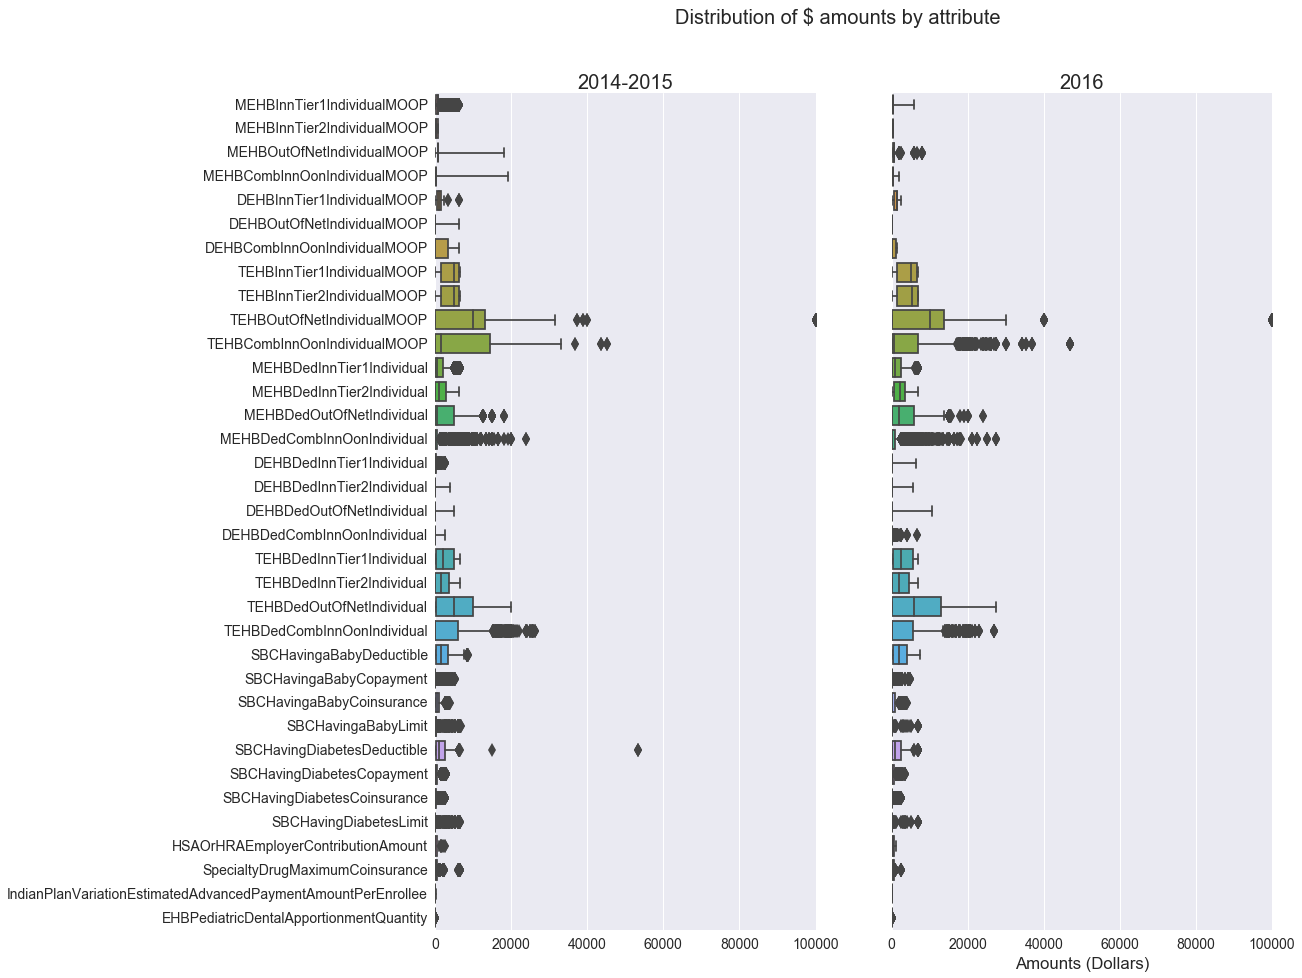

In [26]:
#plot distribution of dollar amount by attributes
# fig = plt.figure(figsize=(15,15))
f, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(15,15))
sns.boxplot(df_cleaned_2014_2015[VarDollars16],orient='h',fliersize=10,ax=ax1);
f.suptitle('Distribution of $ amounts by attribute ', fontsize=20)
ax1.set_title('2014-2015', fontsize=20)

#plot distribution of dollar amount by attributes
sns.boxplot(df_cleaned_2016[VarDollars16],orient='h',fliersize=10,ax=ax2);
ax2.set_title('2016', fontsize=20)
ax2.set_xlabel('Amounts (Dollars)')

### Plan attributes targeting the "Family" household were not found in the dictionary but all had valid dollar values
i.e., all are positive values

In [432]:
VarDollarsFamily1415 = ["MEHBInnTier1FamilyMOOP","MEHBInnTier2FamilyMOOP","MEHBCombInnOonFamilyMOOP","DEHBInnTier1FamilyMOOP", 
              "DEHBOutOfNetFamilyMOOP","DEHBCombInnOonFamilyMOOP","TEHBInnTier2FamilyMOOP",
              "TEHBOutOfNetFamilyMOOP","TEHBCombInnOonFamilyMOOP","MEHBDedInnTier1Family","MEHBDedInnTier2Family",
              "MEHBDedOutOfNetFamily","MEHBDedCombInnOonFamily","DEHBDedInnTier1Family","DEHBDedInnTier2Family",
              "DEHBDedOutOfNetFamily","DEHBDedCombInnOonFamily","TEHBDedInnTier1Family","TEHBDedInnTier2Family",
              "TEHBDedOutOfNetFamily","TEHBDedCombInnOonFamily"]

#Remove dollar signs, format all numbers as floats and check
rows = []
#loop through variables
for col in VarDollarsFamily:         
    exst = df_2014_2015[col][:]
    rows_j = []
    #remove '$' signs and convert to float
    co = 0
    for j in exst:   
        co+=1
        if pd.notnull(j) and j!='Not Applicable':            
            stripped = j.strip('$').replace(',','')
            stripAndFloat = float(stripped)
        else:
            #missing
            stripAndFloat = np.nan            
        rows_j.append(stripAndFloat)
            
    #fill with cleaned data    
    df_cleaned_2014_2015[col] = rows_j
    
    #check how many values are >=0
    numExist = len(df_cleaned_2014_2015[col][pd.notnull(df_cleaned_2014_2015[col])])
    numValid = sum(df_cleaned_2014_2015.loc[:,col]>=0)
    percValid = numValid*100/numExist
    rows.append([col,percValid,numValid])   
pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)','Unique valid values'])

,Column Name,Valid value(%),Unique valid values
0,MEHBInnTier1FamilyMOOP,100,8083
1,MEHBInnTier2FamilyMOOP,100,283
2,MEHBCombInnOonFamilyMOOP,100,778
3,DEHBInnTier1FamilyMOOP,100,888
4,DEHBOutOfNetFamilyMOOP,100,101
5,DEHBCombInnOonFamilyMOOP,100,144
6,TEHBInnTier2FamilyMOOP,100,3253
7,TEHBOutOfNetFamilyMOOP,100,21927
8,TEHBCombInnOonFamilyMOOP,100,10111
9,MEHBDedInnTier1Family,100,19527


### and those variable in 2016 contain free text which is not clear how to cleanup yet

In [453]:
VarDollarsFamily16 = ['DEHBDedInnTier1FamilyPerPerson','DEHBDedInnTier2FamilyPerGroup',
 'DEHBDedInnTier2FamilyPerPerson','DEHBDedOutOfNetFamilyPerGroup',
 'DEHBDedOutOfNetFamilyPerPerson','DEHBInnTier1FamilyPerGroupMOOP',
 'DEHBInnTier1FamilyPerPersonMOOP','DEHBInnTier2FamilyPerGroupMOOP',
 'DEHBInnTier2FamilyPerPersonMOOP','DEHBOutOfNetFamilyPerGroupMOOP',
 'DEHBOutOfNetFamilyPerPersonMOOP','EHBPercentTotalPremium',
 'MEHBCombInnOonFamilyPerGroupMOOP','MEHBCombInnOonFamilyPerPersonMOOP',
 'MEHBDedCombInnOonFamilyPerGroup','MEHBDedCombInnOonFamilyPerPerson',
 'MEHBDedInnTier1FamilyPerGroup','MEHBDedInnTier1FamilyPerPerson',
 'MEHBDedInnTier2FamilyPerGroup','MEHBDedInnTier2FamilyPerPerson',
 'MEHBDedOutOfNetFamilyPerGroup','MEHBDedOutOfNetFamilyPerPerson',
 'MEHBInnTier1FamilyPerGroupMOOP','MEHBInnTier1FamilyPerPersonMOOP',
 'MEHBInnTier2FamilyPerGroupMOOP','MEHBInnTier2FamilyPerPersonMOOP',
 'MEHBOutOfNetFamilyPerGroupMOOP','MEHBOutOfNetFamilyPerPersonMOOP',
 'TEHBCombInnOonFamilyPerGroupMOOP','TEHBCombInnOonFamilyPerPersonMOOP',
 'TEHBDedCombInnOonFamilyPerGroup','TEHBDedCombInnOonFamilyPerPerson',
 'TEHBDedInnTier1FamilyPerGroup','TEHBDedInnTier1FamilyPerPerson',
 'TEHBDedInnTier2FamilyPerGroup','TEHBDedInnTier2FamilyPerPerson',
 'TEHBDedOutOfNetFamilyPerGroup','TEHBDedOutOfNetFamilyPerPerson',
 'TEHBInnTier1FamilyPerGroupMOOP','TEHBInnTier1FamilyPerPersonMOOP',
 'TEHBInnTier2FamilyPerGroupMOOP','TEHBInnTier2FamilyPerPersonMOOP',
 'TEHBOutOfNetFamilyPerGroupMOOP','TEHBOutOfNetFamilyPerPersonMOOP']

### ...and some of them also had large outlier dollar amounts

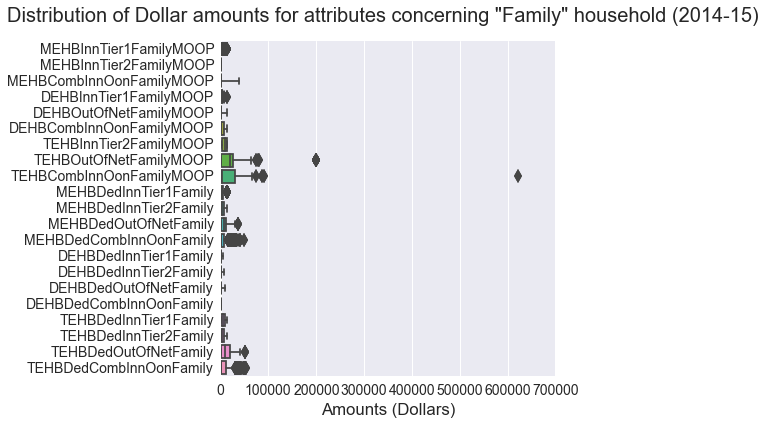

In [456]:
#plot distribution of dollar amount per variable
fig=plt.figure(figsize=(6,6));
sns.boxplot(df_cleaned_2014_2015[VarDollarsFamily1415],orient='h',fliersize=10);
fig.suptitle('Distribution of Dollar amounts for attributes concerning "Family" household (2014-15)', fontsize=20);
plt.xlabel('Amounts (Dollars)');

### "AVCalculatorOutputNumber" attribute contains real numbers as expected

In [28]:
#numbers 2014-15
print sum(np.isreal(df_2014_2015["AVCalculatorOutputNumber"])==1)*100/N_2014_2015,'%of "AVCalculatorOutputNumber" entries for 2014-15 are numbers'

#numbers 2016
print sum(np.isreal(df_2016["AVCalculatorOutputNumber"])==1)*100/N_2016,'%of "AVCalculatorOutputNumber" entries for 2016 are numbers'

100 %of "AVCalculatorOutputNumber" entries for 2014-15 are numbers
100 %of "AVCalculatorOutputNumber" entries for 2016 are numbers


### All other variables contained free texts (difficult to check systematically)

In [29]:
### All other variables contained free texts (difficult to check systematically)
#variables
VarWithNoSpecifiedVals = ['VersionNum','BenefitPackageId','TIN','StandardComponentId','PlanMarketingName','HIOSProductId','HPID','NetworkId',
                          'ServiceAreaId','FormularyId','SpecialistRequiringReferral','PlanLevelExclusions',
                         'ChildOnlyPlanId','OutOfCountryCoverageDescription','OutOfServiceAreaCoverageDescription',
                         'URLForSummaryofBenefitsCoverage','URLForEnrollmentPayment','PlanBrochure','FormularyURL','PlanId']
rows = []

#Display unique existing values among for visual check
for col in VarWithNoSpecifiedVals:        
    uniqVals = pd.Series.unique(df_2014_2015[col][pd.notnull(df_2014_2015[col])])                  
    minVals =  np.min(uniqVals)
    maxVals =  np.max(uniqVals)    
    numVals = len(uniqVals)      
    rows.append([col,minVals,maxVals,uniqVals,numVals])
tab = pd.DataFrame(rows,columns=['Column Name', 'Min value','Max value','Unique values','# of unique values'])
#display all data
pd.set_option('display.max_colwidth',999,'display.max_row',len(VarWithNoSpecifiedVals))
tab

,Column Name,Min value,Max value,Unique values,# of unique values
0,VersionNum,1,21,"[6, 3, 2, 1, 7, 10, 5, 4, 13, 8, 12, 9, 16, 11, 14, 15, 19, 17, 18, 20, 21]",21
1,BenefitPackageId,1,84,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18, 19, 31, 32, 28, 29, 16, 17, 21, 22, 23, 15, 11, 12, 13, 14, 30, 20, 24, 25, 26, 27, 40, 42, 35, 41, 36, 37, 39, 33, 34, 38, 43, 44, 45, 48, 49, 50, 52, 53, 54, 55, 56, 65, 66, 67, 69, 70, 71, 72, 73, 82, 83, 84, 47, 59]",66
2,TIN,01-0286541,95-6042390,"[93-0438772, 93-0989307, 13-5123390, 35-0472300, 47-0098400, 95-6042390, 93-0242990, 39-1263473, 63-1028262, 73-0654885, 75-1233841, 13-5581829, 86-0274899, 63-0103830, 94-2761537, 61-1013183, 86-0207231, 91-1857813, 86-0004538, 46-1509576, 59-1031071, 46-2210067, 45-4370907, 06-6033492, 36-3097810, 59-2015694, 27-3835905, 86-0307623, 59-3315064, 58-2876465, 59-2403696, 65-0073323, 61-1103898, 26-3238817, 59-1419293, 47-0397286, 26-0155137, 14-1917982, 65-0986441, 20-8937577, 65-0743731, 45-3131932, 20-3174593, 58-1638390, 58-1592076, 58-2335921, 58-2209549, 35-0781558, 13-5581929, 58-0469845, 39-1821211, 34-0648820, 36-3691770, 31-1069321, 35-1931354, 72-0977315, 72-1071369, 72-1279235, 45-3188075, 72-1285173, 23-7384555, 86-0257201, 75-1296086, 43-1680523, 43-1257251, 43-0908349, 20-8570212, 56-0894904, 43-1501438, 20-0229117, 41-0952670, 45-0173185, 41-1242261, 56-1018068, 91-1842494, 45-3262003, 22-3338404, 23-2314460, 22-0999690, 33-0733552, 22-3849572, 23-1661402, 22-1896118...",311
3,StandardComponentId,10064IN0050001,99969OH0070002,"[21989AK0020002, 21989AK0020001, 21989AK0010001, 73836AK0650002, 73836AK0680004, 73836AK0630001, 73836AK0680038, 42507AK0020001, 42507AK0030001, 73836AK0630002, 38536AK0010001, 38536AK0010002, 38536AK0010003, 42507AK0010001, 73836AK0680034, 73836AK0680015, 45858AK0030002, 73836AK0630003, 73836AK0630004, 73836AK0680017, 42507AK0050001, 42507AK0040001, 42507AK0060001, 45858AK0040002, 45858AK0040001, 73836AK0650001, 73836AK0680042, 73836AK0650003, 45858AK0030001, 73836AK0680007, 73836AK0650004, 73836AK0680011, 73836AK0680027, 73836AK0680030, 73836AK0680019, 73836AK0680040, 73836AK0640001, 73836AK0620001, 73836AK0640002, 73836AK0620002, 74819AK0020001, 74819AK0010001, 74819AK0020002, 74819AK0010002, 74819AK0010003, 74819AK0020003, 74819AK0020004, 74819AK0010004, 74819AK0020005, 74819AK0010005, 74819AK0010006, 74819AK0020006, 84859AK0040002, 44580AL0360013, 44580AL0360014, 44580AL0360005, 17454AZ0040001, 17454AZ0060001, 18156AZ0010001, 18156AZ0010002, 44785AL0020002, 44785AL0040001, 51...",13263
4,PlanMarketingName,AmeriHealth NJ Premium National Access Gold POS Plus,myCignaHealth Flex 5000 Bronze,"[Premier, Be Connected, PPO 1000A, Be Protected, Beneficial 2000, Guardian Pediatric Essentials, Guardian Family Advantage Plus, Be Prepared, DentalConnect�, Guardian Pediatric Advantage, Value 2000, EHB High Passive, Beneficial 4000, Guardian Family Essentials Plus, Guardian Family Advantage, Guardian Family Essentials, EHB High PPO, EHB Low PPO, Be Aligned, Beneficial 5000, EHB Low Passive, PPO 1500, Be Savvy, Be Bold, BESTOne Child Dental Plus, BEST Life Child Dental Plus, BESTOne Child Dental, BEST Life Child Dental, BEST Dental Advantage - Gold, BESTOne Dental Advantage - Gold, BESTOne Dental Plus - Gold, BEST Dental Plus - Gold, BEST Dental Plus - Silver, BEST Dental Basic - Silver, Humana Local Preferred Silver 4600/6300 Plan, Humana Local Preferred Gold 2500/3500 Plan, Humana Local Preferred Platinum 1000/1500 Plan, Smile for Health Family C60A60, Smile for Health Child C60A50, Health Net PPO Platinum $15/$30/$750, Health Net PPO Gold $20/$40/$500, Health Net PPO Platinum...",7325
5,HIOSProductId,10064IN005,99969OH007,"[21989AK002, 21989AK001, 73836AK065, 73836AK068, 73836AK063, 42507AK002, 42507AK003, 38536AK001, 42507AK001, 45858AK003, 42507AK005, 42507AK004, 42507AK006, 45858AK004, 73836AK064, 73836AK062, 74819AK002, 74819AK001, 84859AK004, 44580AL036, 17454AZ004, 17454AZ006, 18156AZ001, 44785AL002, 44785AL004, 51485AZ01

In [30]:
### All other variables contained free texts (difficult to check systematically)
#variables
VarWithNoSpecifiedVals = ['VersionNum','BenefitPackageId','TIN','StandardComponentId','PlanMarketingName','HIOSProductId','HPID','NetworkId',
                          'ServiceAreaId','FormularyId','SpecialistRequiringReferral','PlanLevelExclusions',
                         'ChildOnlyPlanId','OutOfCountryCoverageDescription','OutOfServiceAreaCoverageDescription',
                         'URLForSummaryofBenefitsCoverage','URLForEnrollmentPayment','PlanBrochure','FormularyURL','PlanId']
rows = []

#Display unique existing values among for visual check
for col in VarWithNoSpecifiedVals:        
    uniqVals = pd.Series.unique(df_2016[col][pd.notnull(df_2016[col])])                  
    minVals =  np.min(uniqVals)
    maxVals =  np.max(uniqVals)    
    numVals = len(uniqVals)      
    rows.append([col,minVals,maxVals,uniqVals,numVals])
tab = pd.DataFrame(rows,columns=['Column Name', 'Min value','Max value','Unique values','# of unique values'])
#display all data
pd.set_option('display.max_colwidth',999,'display.max_row',len(VarWithNoSpecifiedVals))
tab

,Column Name,Min value,Max value,Unique values,# of unique values
0,VersionNum,1,27,"[4, 10, 1, 5, 2, 3, 8, 6, 9, 7, 11, 12, 17, 14, 15, 13, 27, 16, 26]",19
1,BenefitPackageId,1,54,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 21, 33, 34, 13, 14, 15, 19, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 35, 36, 16, 17, 18, 29, 38, 39, 37, 40, 41, 42, 43, 45, 47, 48, 50, 52, 54]",49
2,TIN,01-0286541,99-0107971,"[93-0438772, 91-0499247, 47-0098400, 93-0989307, 47-0397286, 57-0523959, 42-0127290, 95-6042390, 39-1263473, 36-0883760, 81-0170040, 93-0242990, 13-5123390, 13-5581829, 63-0103830, 36-3757528, 63-0899562, 63-1028262, 61-1013183, 75-1233841, 94-2761537, 59-0397210, 35-0472300, 86-0274899, 47-0322111, 86-0004538, 73-0654885, 91-1857813, 20-4023720, 20-2706634, 44-0308260, 46-2210067, 23-2169745, 41-0808596, 36-3097810, 59-1031071, 86-0334392, 36-1665915, 35-1665915, 86-0307623, 59-2015694, 59-2411584, 06-0641618, 59-3315064, 59-2403696, 59-2876465, 65-0073323, 61-1103898, 26-3238817, 14-1917982, 26-0155137, 65-0743731, 65-0986441, 59-1293865, 45-3131932, 27-0963551, 45-2548158, 72-0977315, 58-1653544, 58-1638390, 36-4802632, 58-0469845, 58-1649568, 58-2335921, 58-1592076, 58-2209549, 31-1185262, 35-1279304, 35-0781558, 35-1545647, 26-2127080, 31-1069321, 32-0121856, 46-5270582, 47-2586982, 72-1071369, 72-1074008, 72-1279235, 72-1285173, 23-7384555, 86-0257201, 23-1661402, 43-1257251...",290
3,StandardComponentId,10046HI0020003,99969OH0080010,"[21989AK0030001, 21989AK0050001, 38344AK1020001, 21989AK0080001, 21989AK0080002, 21989AK0050002, 21989AK0090001, 21989AK0070001, 21989AK0090002, 21989AK0100001, 21989AK0100002, 21989AK0110001, 21989AK0120001, 45858AK0040002, 45858AK0040001, 73836AK0700008, 73836AK0700009, 45858AK0030002, 45858AK0030001, 47904AK0070001, 47904AK0090001, 47904AK0090002, 47904AK0070002, 47904AK0080001, 47904AK0080002, 58670AK0020001, 73836AK0850001, 73836AK0700001, 84394AK0050001, 84394AK0050002, 12538AL0020003, 12538AL0010007, 28899AL0040002, 28899AL0040001, 28899AL0030002, 28899AL0030001, 44580AL0360003, 73836AK0700002, 73836AK0850002, 73836AK0700003, 73836AK0700004, 73836AK0700005, 73836AK0700006, 73836AK0700007, 73836AK0700010, 73836AK0880001, 73836AK0860001, 73836AK0880002, 73836AK0880003, 73836AK0860002, 73836AK0880004, 73836AK0810001, 73836AK0750001, 73836AK0810002, 73836AK0750002, 73836AK0750003, 73836AK0750004, 73836AK0840001, 73836AK0710006, 73836AK0710002, 73836AK0710007, 73836AK0710003, 73...",8845
4,PlanMarketingName,1500D 20 COINS OV 35,"myBlue Choice LP $5,500","[Delta Dental Premier Plan, Delta Dental PPO 1000 Plan, Balance Kids' Dental, Delta Dental Premier Advance Plan 1000, Delta Dental Premier Advance Plan 1500, Delta Dental PPO 1500 Plan, Delta Dental Premier Practical Plan 1000, Delta Dental Premier Healthy Smiles, Delta Dental Premier Practical Plan 1500, Delta Dental PPO Prosperous Plan 1000, Delta Dental PPO Prosperous Plan 1500, Delta Dental Premier Child Only, Delta Dental PPO Child Only, EHB High PPO, EHB Low PPO, PPO 1500 (Select), PPO 2500 (Select), EHB High Passive, EHB Low Passive, Delta Dental Individual PPO, EHB Certified, Renaissance Group Dental PPO, EHB Certified, Renaissance Individual Dental PPO, EHB Certified, Group Dental Policy, Moda Health Select Be Secure, PPO 500 (Providence), Principal Plan Dental 70, Principal Plan Dental 85, BESTOne Advantage Gold, BESTDental Premium, Humana Silver 3800/Birmingham PPOx, PPO 1000 (Providence), Moda Health Providence Be Secure, PPO 1500 (Providence), PPO 2500 (Providence), P...",4459
5,HIOSProductId,10046HI002,99969OH008,"[21989AK003, 21989AK005, 38344AK102, 21989AK008, 21989AK009, 21989AK007, 21989AK010, 21989AK011, 21989AK012, 45858AK004, 73836AK070, 45858AK003, 47904AK007, 47904AK009, 47904AK008, 58670AK002, 73836AK085, 84394AK005, 12538AL002, 12538AL001, 28899AL004, 28899AL003, 44580AL036, 73836AK088, 73836AK086, 73836AK081, 73836AK075, 73836AK084, 73836AK071, 73836AK080, 73836AK079, 73836AK082, 74819AK002, 74819AK001, 81761AK004, 39

### Format all the dates


In [31]:
#2014-15
df_cleaned_2014_2015['ImportDate'] = pd.to_datetime(df_2014_2015['ImportDate'])
df_cleaned_2014_2015['PlanExpirationDate'] = pd.to_datetime(df_2014_2015['PlanExpirationDate'])

#Useful meta columns
df_cleaned_2014_2015['yearImport'] = df_cleaned_2014_2015['ImportDate'].apply(lambda d: d.year)
df_cleaned_2014_2015['yearMonthImport'] = df_cleaned_2014_2015['ImportDate'].apply(lambda d: dt.datetime(d.year, d.month,1))
df_cleaned_2014_2015['yearPlanExpiration'] = df_cleaned_2014_2015['PlanExpirationDate'].apply(lambda d: d.year)

#and 2016
df_cleaned_2016['ImportDate'] = pd.to_datetime(df_2016['ImportDate'])
df_cleaned_2016['PlanExpirationDate'] = pd.to_datetime(df_2016['PlanExpirationDate'])

#Useful meta columns
df_cleaned_2016['yearImport'] = df_cleaned_2016['ImportDate'].apply(lambda d: d.year)
df_cleaned_2016['yearMonthImport'] = df_cleaned_2016['ImportDate'].apply(lambda d: dt.datetime(d.year, d.month,1))
df_cleaned_2016['yearPlanExpiration'] = df_cleaned_2016['PlanExpirationDate'].apply(lambda d: d.year)

# Save cleaned data

In [32]:
from os.path import expanduser
home = expanduser("~")
if not os.path.exists(home+DATA_FILE_cleaned):
    os.makedirs(home+DATA_FILE_cleaned)
    df_cleaned.to_csv(home+DATA_FILE_cleaned+'Plan_Attributes_PUF_cleaned_2014_2015.csv')
    print 'Cleaned files were created in', home+DATA_FILE_cleaned
else: 
    if not os.path.exists(home+DATA_FILE_cleaned+'Plan_Attributes_PUF_cleaned_2014_2015.csv'):
        df_cleaned.to_csv(home+DATA_FILE_cleaned+'Plan_Attributes_PUF_cleaned_2014_2015.csv')
        print 'Cleaned files were created in', home+DATA_FILE_cleaned
    else:
        os.remove(home+DATA_FILE_cleaned+'Plan_Attributes_PUF_cleaned_2014_2015.csv')
#         os.makedirs(home+DATA_FILE_cleaned)
        df_cleaned.to_csv(home+DATA_FILE_cleaned+'Plan_Attributes_PUF_cleaned_2014_2015.csv')
print 'Cleaned files were updated'    

Cleaned files were updated


### Check the data completeness over time

### 2014-15

In [33]:
summarize_completeness_over_time(df_cleaned_2014_2015,'yearMonthImport')

*** Data completeness over time per column ***


yearMonthImport,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00
BusinessYear,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
IssuerId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
SourceName,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
VersionNum,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
ImportDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
BenefitPackageId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode2,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
MarketCoverage,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
DentalOnlyPlan,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


### 2016

In [34]:
summarize_completeness_over_time(df_cleaned_2016,'yearMonthImport')

*** Data completeness over time per column ***


yearMonthImport,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00
BusinessYear,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
IssuerId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
SourceName,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
VersionNum,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
ImportDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
BenefitPackageId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode2,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
MarketCoverage,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
DentalOnlyPlan,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


# Basic summary statistics

## Number of imports peaks in January 2014 and 2015 (dataset 2014-15)
(checked: all rows had import dates)

*** Data completeness over time per column ***


yearMonthImport,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00
BusinessYear,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
IssuerId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
SourceName,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
VersionNum,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
ImportDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
BenefitPackageId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode2,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
MarketCoverage,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
DentalOnlyPlan,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


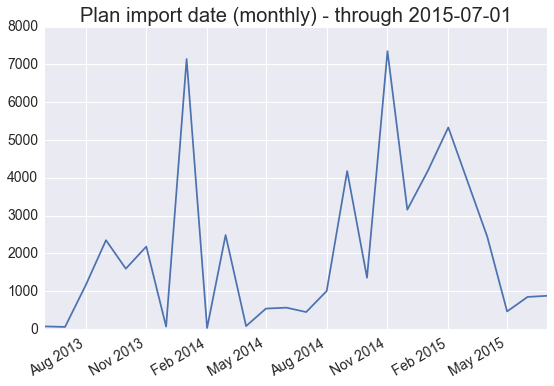

In [35]:
fig, ax = plt.subplots(1)
df_cleaned_2014_2015['yearMonthImport'].value_counts().sort_index().plot(ax=ax)
maxdate = df_cleaned_2014_2015['yearMonthImport'].max().strftime('%Y-%m-%d')
ax.set_title('Plan import date (monthly) - through %s' % maxdate)
ax.set_ylim(0, ax.get_ylim()[1])
summarize_completeness_over_time(df_cleaned_2014_2015,'yearMonthImport')

## ...then in August 2015 and January 2016 (dataset 2016)
(checked: all rows had import dates)

*** Data completeness over time per column ***


yearMonthImport,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00
BusinessYear,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
IssuerId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
SourceName,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
VersionNum,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
ImportDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
BenefitPackageId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode2,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
MarketCoverage,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
DentalOnlyPlan,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


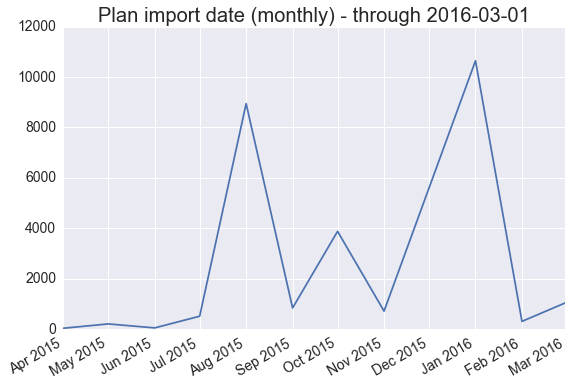

In [36]:
fig, ax = plt.subplots(1)
df_cleaned_2016['yearMonthImport'].value_counts().sort_index().plot(ax=ax)
maxdate = df_cleaned_2016['yearMonthImport'].max().strftime('%Y-%m-%d')
ax.set_title('Plan import date (monthly) - through %s' % maxdate)
ax.set_ylim(0, ax.get_ylim()[1])
summarize_completeness_over_time(df_cleaned_2016,'yearMonthImport')

### Wisconsin and Texas imported the highest total number of plans (more than 2500) while states like Delaware imported the lowest
from 2014 to 2015
e.g., I verified that all rows were different from each other which would mean that rows contain different Health insurance plans

The dataset contains plans for 38 of the 50 US states
The dataset contains plans for

/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


 38 of the 50 US states


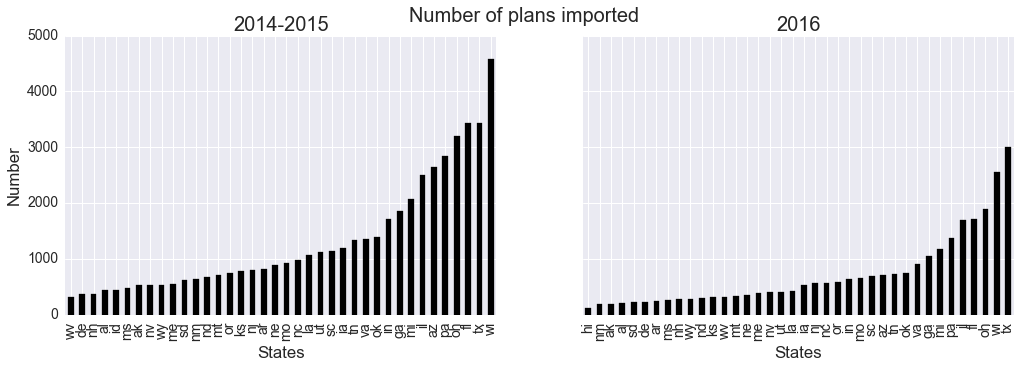

In [37]:
f, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(17,5))
f.suptitle('Number of plans imported', fontsize=20)

print 'The dataset contains plans for',len(np.unique(df_cleaned_2014_2015['StateCode'])), 'of the 50 US states'
a = df_cleaned_2014_2015.groupby('StateCode').agg(['count']);
a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False,ax=ax1);
ax1.set_title('2014-2015', fontsize=20)
ax1.set_xlabel('States');
ax1.set_ylabel('Number');


print 'The dataset contains plans for',len(np.unique(df_cleaned_2016['StateCode'])), 'of the 50 US states'
a = df_cleaned_2016.groupby('StateCode').agg(['count']);
a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False,ax=ax2);
ax2.set_title('2016', fontsize=20)
ax2.set_xlabel('States');

### Most plans are available both on and off the exchange marketplace and most states offer plans both on/off exchange marketplace 
(checked: "QHPNonQHPTypeId" is complete)

/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


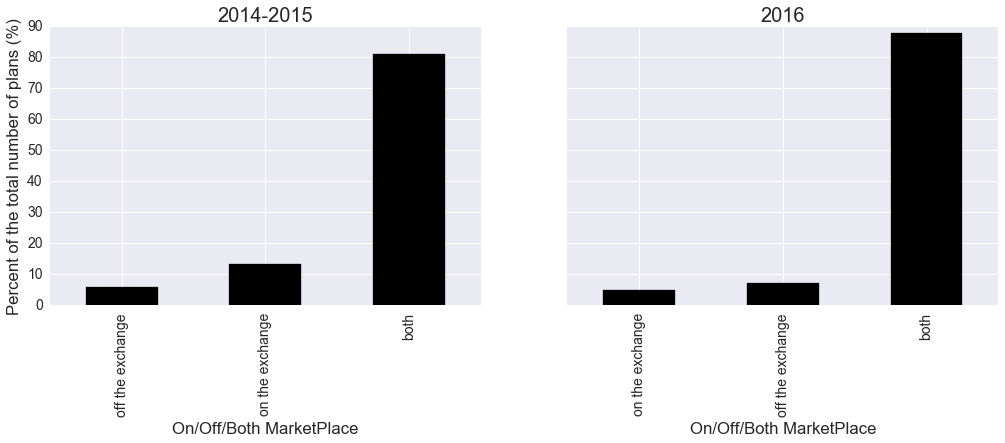

In [39]:
f, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(17,5))

#2014-15
a = df_cleaned_2014_2015.groupby('QHPNonQHPTypeId').agg(['count'])*100/N_2014_2015;
a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False,ax=ax1);
ax1.set_title('2014-2015', fontsize=20)
ax1.set_xlabel('On/Off/Both MarketPlace');
ax1.set_ylabel('Percent of the total number of plans (%)');

#2016
a = df_cleaned_2016.groupby('QHPNonQHPTypeId').agg(['count'])*100/N_2016;
ax2.set_title('2016', fontsize=20)
a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False,ax=ax2);
ax2.set_xlabel('On/Off/Both MarketPlace');

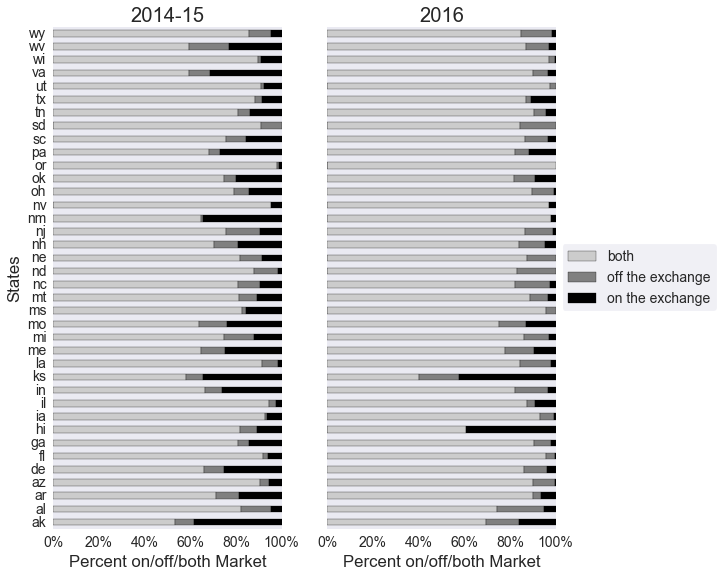

In [40]:
f, (ax1,ax2) = plt.subplots(ncols=2,sharey=True,figsize=(17,5))

#Proportion of plan on/off/both on MarketPlace by state
s = df_cleaned_2014_2015.groupby(['StateCode','QHPNonQHPTypeId']).size().unstack();
ax = s.div(s.sum(axis=1),axis=0).fillna(0).plot(kind='barh', stacked=True,figsize=(9,9),color=[(.8,.8,.8),(.5,.5,.5),(0,0,0)],grid=False,ax=ax1);
percentify_axis(ax,'x');
ax1.set_ylabel('States');
ax1.set_xlabel('Percent on/off/both Market');
ax1.set_title('2014-15');
ax1.legend_.remove()

#Proportion of plan on/off/both on MarketPlace by state
s = df_cleaned_2016.groupby(['StateCode','QHPNonQHPTypeId']).size().unstack();
ax = s.div(s.sum(axis=1),axis=0).fillna(0).plot(kind='barh', stacked=True,figsize=(9,9),color=[(.8,.8,.8),(.5,.5,.5),(0,0,0)],grid=False,ax=ax2);
percentify_axis(ax,'x');
ax2.set_title('2016');
ax2.set_ylabel('States');
ax2.set_xlabel('Percent on/off/both Market');
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### Texas has the highest number of unique issuer organization and new Mexico the lowest (2014-16)

The 2014-15 dataset contains 824 different issuer organizations
The 2016 dataset contains

/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


 769 different issuer organizations


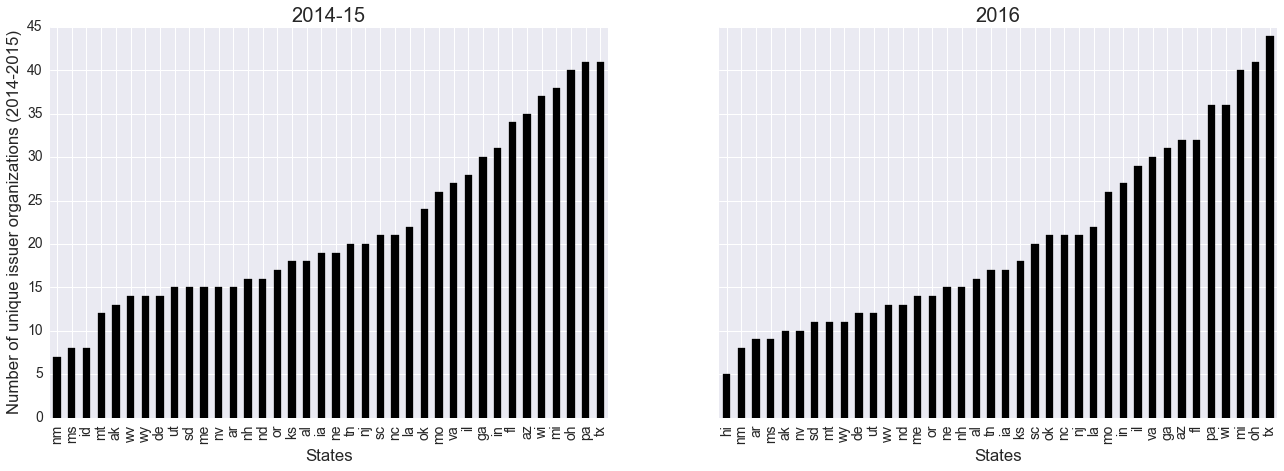

In [41]:
f, (ax1,ax2) = plt.subplots(ncols=2,sharey=True,figsize=(22,7))

#2014-15
print 'The 2014-15 dataset contains',len(np.unique(df_cleaned_2014_2015['IssuerId'])), 'different issuer organizations'
a = df_cleaned_2014_2015.groupby(['StateCode'])['IssuerId'].nunique();
a.sort()
a.plot(kind='bar',color='k',legend=False,ax=ax1);
ax1.set_title('2014-15');
ax1.set_xlabel('States');
ax1.set_ylabel('Number of unique issuer organizations (2014-2015)');

#2016
print 'The 2016 dataset contains',len(np.unique(df_cleaned_2016['IssuerId'])), 'different issuer organizations'
a = df_cleaned_2016.groupby(['StateCode'])['IssuerId'].nunique();
a.sort()
a.plot(kind='bar',color='k',legend=False,ax=ax2);
ax2.set_title('2016');
ax2.set_xlabel('States');
ax2.set_ylabel('Number of unique issuer organizations (2016)');

### There are more mid-level plans (Silver, Bronze) than highly ranked (Platinum, Gold) plans (2014-2016)
Assuming that ranking is typically Bronze - Silver - Gold - Platinum from the lowest to the highest

The metalLevel is based on the plan actuarial value : the percentage of costs that the plan pays before the 
insured has met the out-of-pocket maximum

/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


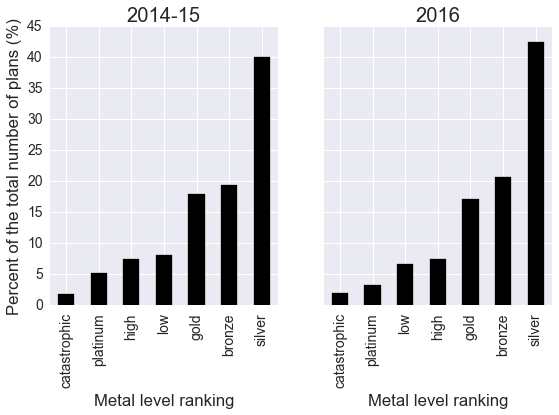

In [42]:
f, (ax1,ax2) = plt.subplots(ncols=2,sharey=True,figsize=(9,5))

#2014-15
a = df_cleaned_2014_2015.groupby('MetalLevel').agg(['count'])*100/N_2014_2015;
a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False,ax=ax1);
ax1.set_title('2014-15');
ax1.set_xlabel('Metal level ranking');
ax1.set_ylabel('Percent of the total number of plans (%)');

#2016
a = df_cleaned_2016.groupby('MetalLevel').agg(['count'])*100/N_2016;
a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False,ax=ax2);
ax2.set_title('2016');
ax2.set_xlabel('Metal level ranking');
ax2.set_ylabel('Percent of the total number of plans (%)');

### ...and mid-level plans are the plans most often offered by most states with equivalent distributions of rankings across states (2014-2016)

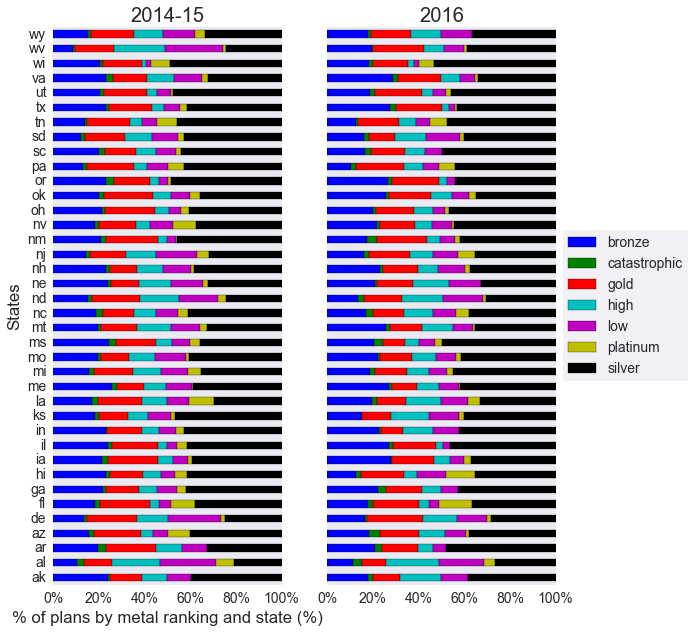

In [43]:
f, (ax1,ax2) = plt.subplots(ncols=2,sharey=True,figsize=(9,10))

#Proportion of plan on/off/both on MarketPlace by state
s = df_cleaned_2014_2015.groupby(['StateCode','MetalLevel']).size().unstack();
ax = s.div(s.sum(axis=1),axis=0).fillna(0).plot(kind='barh', stacked=True,grid=False,ax=ax1);
percentify_axis(ax,'x');
ax1.set_ylabel('States');
ax1.set_xlabel('% of plans by metal ranking and state (%)');
ax1.set_title('2014-15');
ax1.legend_.remove()

#Proportion of plan on/off/both on MarketPlace by state
s = df_cleaned_2016.groupby(['StateCode','MetalLevel']).size().unstack();
ax = s.div(s.sum(axis=1),axis=0).fillna(0).plot(kind='barh', stacked=True,grid=False,ax=ax2);
percentify_axis(ax,'x');
ax2.set_ylabel('States');
ax2.set_title('2016');
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));